In [30]:
setwd('C://Users//kkami//downloads')

In [31]:
library(dplyr)
library(ggplot2)
print('Supress library outputs')

[1] "Supress library outputs"


In [32]:
lux25 <- read.csv('lux25.csv', header = T) #read in test result data

In [68]:
dim(lux25)
table(lux25$Sample) #ensure number of samples are even between HAI and competitor samples

[1] 50  2


Competitor        HAI 
        25         25 

In [78]:
head(lux25) 

#The first 6 rows shown below give the Sample column (whether or not this is our product
#or a competitors, along with the 'Lux' reading that denotes the area under the curve measured from the developed
#smoke tester (see attached powerpoint within this repository for details on test setup and quantity outputs)

,Sample,Lux
,<fct>,<dbl>
1,Competitor,16.16
2,Competitor,14.80
3,Competitor,15.64
4,Competitor,16.40
5,Competitor,15.10
6,Competitor,15.60


In [79]:
summary(lux25) #examine overall stats of combined HAI and competitor products

        Sample        Lux       
 Competitor:25   Min.   :14.48  
 HAI       :25   1st Qu.:15.67  
                 Median :16.38  
                 Mean   :16.62  
                 3rd Qu.:17.56  
                 Max.   :19.16  

In [80]:
lux251 <- ggplot(lux25, aes(x = Lux)) #set up base plot

In [81]:
options(repr.plot.width=15, repr.plot.height=8) #adjust plot size

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



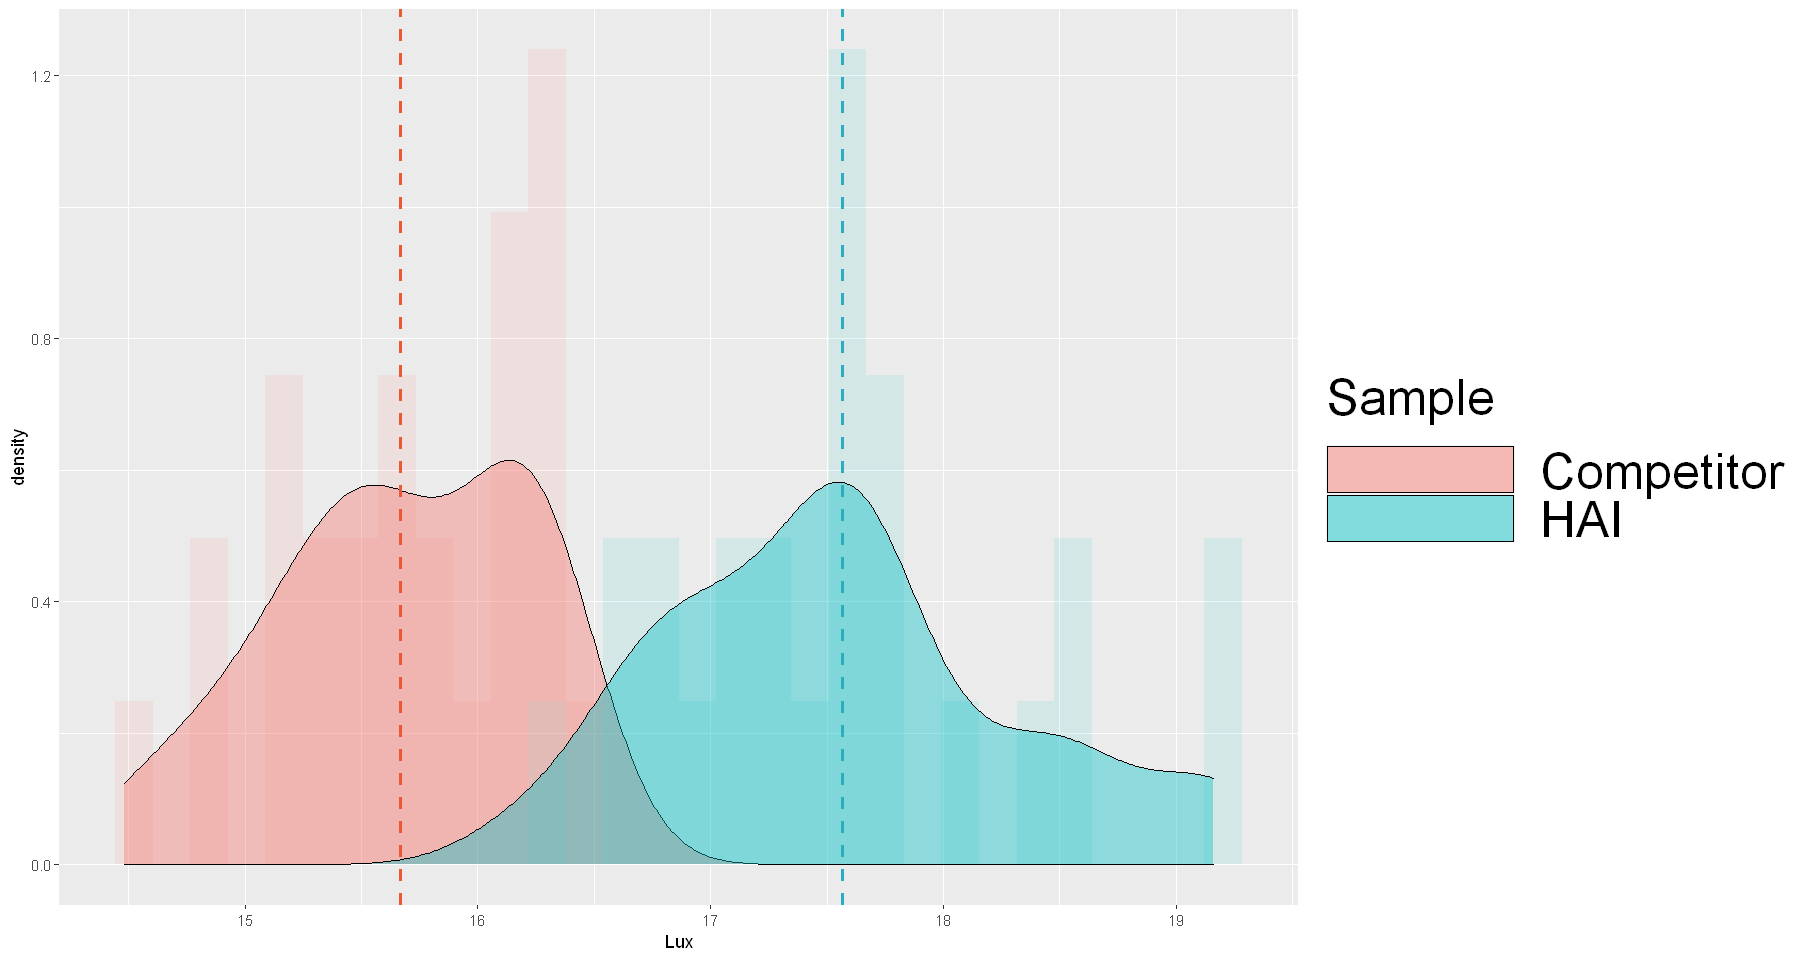

In [82]:
lux251 + 
  geom_histogram(alpha = 0.1, aes(y=..density.. ,fill = Sample)) + 
  #scale_fill_manual(values = c("#17B265", "#B82136")) + 
  geom_density(aes(fill = Sample), alpha = 0.4) +
    theme(legend.key.height= unit(1, 'cm'),
    legend.key.width= unit(4, 'cm'), legend.title = element_text(size=30), legend.text = element_text(size=30)) +
  geom_vline(aes(xintercept = (lux25 %>% filter(Sample == 'HAI') %>% summarize(mean = mean(Lux)) %>% as.double(.))),size = 1, linetype = "dashed", color = "#2cacbf") +
  geom_vline(aes(xintercept = (lux25 %>% filter(Sample == 'Competitor') %>% summarize(mean = mean(Lux)) %>% as.double(.))), size = 1, linetype = "dashed", color ="#eb5834" )

#create a visualization of the cumultalive distrubution density over histogram of values, with vertical
#dashed lines as indicates of overall mean

#Recall that a higher 'lux' amount (measure of light intensity through the smoke) is a measure of how much light is able to 
#reach the sensor. Therefore, a higher lux amount indicates lower smoke levels from HAI products vs. the competitor product.

In [84]:
HAI <- filter(lux25, Sample == 'HAI') #split samples into HAI and Competitor samples 
comp <- filter(lux25, Sample == 'Competitor')

In [61]:
t.test(HAI$Lux,comp$Lux) #perform T-test to assess difference in sample testing. Note the 
#p-value is 5.86^-13, i.e. significant indication that these samples are in fact different


	Welch Two Sample t-test

data:  HAI$Lux and comp$Lux
t = 10.105, df = 43.26, p-value = 5.86e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.518965 2.276235
sample estimates:
mean of x mean of y 
  17.5664   15.6688 


In [62]:
sd(HAI$Lux) #examine devation between samples. 
sd(comp$Lux)

#the HAI sample has a larger variation in sample testing vs. the competitor. This would likely benefit from aditional 
#testing to close the gap in standard deviations

[1] 0.7659574

[1] 0.5430187

In [76]:
lux_stats <- lux25 %>% group_by(Sample) %>% summarize(mean(Lux), median(Lux), sd(Lux), 
                                                       quantile(Lux, 0.25), quantile(Lux, 0.75), max(Lux))

lux_stats #examine the quartile ranges in tabular form bewteen HAI and competitor samples to see where the samples lie

`summarise()` ungrouping output (override with `.groups` argument)



Sample,mean(Lux),median(Lux),sd(Lux),"quantile(Lux, 0.25)","quantile(Lux, 0.75)",max(Lux)
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Competitor,15.6688,15.64,0.5430187,15.34,16.12,16.40
HAI,17.5664,17.56,0.7659574,17.06,17.82,19.16


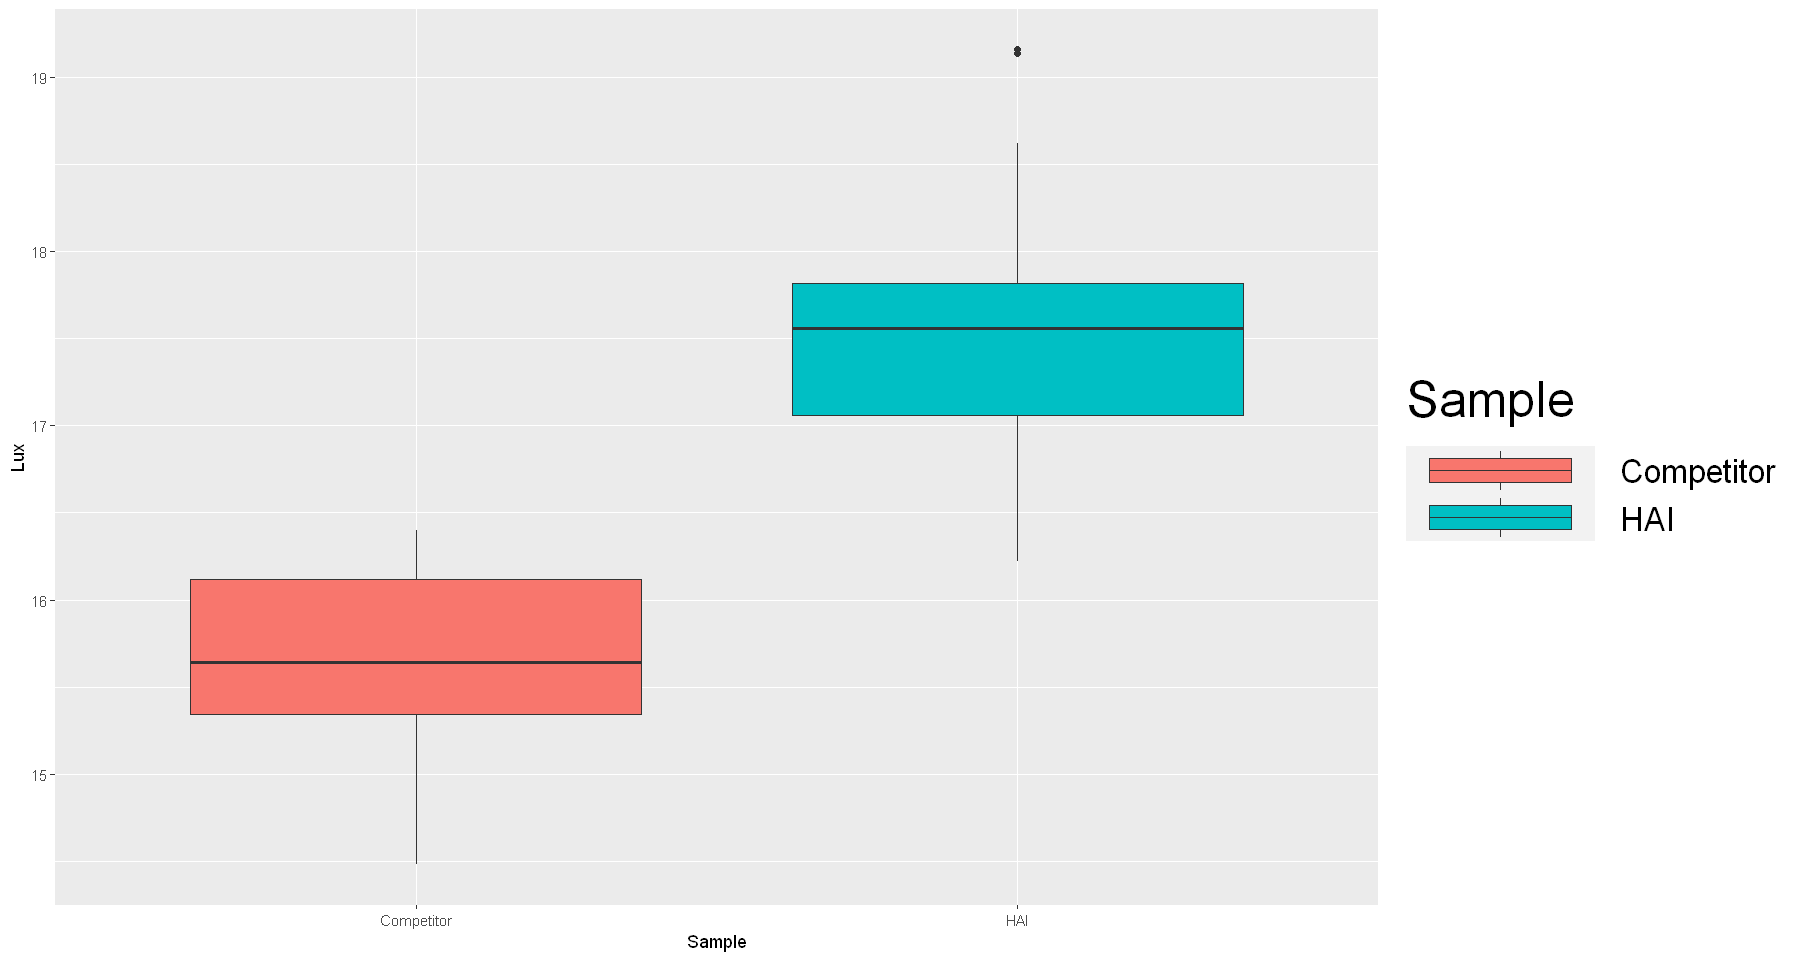

In [75]:
 ggplot(lux25, aes(x=Sample, y = Lux)) + geom_boxplot(aes(fill = Sample)) +
   theme(legend.position = "right", legend.title = element_text(size = 30), legend.text = element_text(size = 20), 
        legend.key.height= unit(1, 'cm'),
    legend.key.width= unit(4, 'cm'))

#visualize the differents in IQ range with boxplot to visualize differences in sample medians

In [ ]:
#Again the higher lux value in the HAI samples indicates the ability of light to reach the sensor with less obstruction, 
#indicating reduced smoke in this particular HAI formulation vs. the competitive sample. 